## Getting Started

In [1]:
from arcgis.gis import GIS
from arcgis.geoenrichment import enrich, create_report, BufferStudyArea, Country
from arcgis.features import FeatureSet
from arcgis.geometry import Point
import webbrowser
import warnings
import pandas as pd

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

gis = GIS(api_key="YOUR-API-KEY")

## Getting Know Data

In [2]:
redlands_parks = pd.read_csv("data/Redlands_Park_Points.csv")
redlands_parks

,NAME,Latitude,Longitude,AREA_ACRES,GlobalID,FacilityID,Condition
0,Sports Park,34.079086,-117.146007,36.160241,2cd1b3c1-a7f6-4710-9a34-46479a735d5a,2,
1,Texonia Park,34.071626,-117.191689,6.563664,9f7fa0c5-1a82-497a-a10f-193a649e58e6,4,
2,Crafton Park,34.061057,-117.139976,6.421237,5a26f605-0d5c-4353-9588-885c6385c28f,8,
3,Jennie Davis Park,34.058803,-117.194749,2.639920,f33591fc-b84e-4064-8342-57226d0400c1,9,
4,Ed Hales Park,34.056712,-117.181236,0.219296,3405c959-8b22-45df-8e04-ef87874fdfe0,10,
5,Smiley Park,34.053462,-117.184609,2.162654,f8aca41d-7537-4a6b-ac10-722c573d28cf,11,
6,Brookside Park,34.045661,-117.209749,9.471069,2a43876f-922e-4954-b615-e510645d93ff,15,
7,Prospect Park,34.038974,-117.172073,33.426063,be748538-5efa-4813-8de9-9d5d6b2cdf55,17,
8,Franklin Park,34.038864,-117.167556,0.572867,59b56e9e-2bc7-42f1-b40f-47641fb5a905,18,
9,Oakmont Park,34.011936,-117.122611,14.570550,3851706a-3ce6-46c0-aad1-b2ba47b15b2e,20,


In [3]:
redlands_map = gis.map('Redlands, CA, USA', zoomlevel=12)

simple_marker_symbol = {
    "type": "esriSMS",
    "style": "esriSMSCircle",
    "color": [0, 255, 0],
    "outline": {"color": [0, 0, 0], "width": 1},
}

for i, row in redlands_parks.iterrows():
    redlands_map.draw(
        shape=Point({"x":row["Longitude"], "y":row["Latitude"], "spatialReference": {"wkid":4326}}),
        symbol=simple_marker_symbol,
        popup={
            "title": row.to_dict()["NAME"],
            "content": '',
        }
    )
    
redlands_map

MapView(layout=Layout(height='400px', width='100%'))

## Enriching Neighborhood Areas

In [4]:
# Need to enable Service Area service for your API key

parks_walking_areas = [BufferStudyArea(
    area=Point({"x":park["Longitude"], "y":park["Latitude"], "spatialReference": {"wkid":4326}}),
    radii=[15], 
    units='Minutes',
    travel_mode='Walking', 
    overlap=True
) for park in redlands_parks.to_dict('records')]

parks_walking_areas[0]

BufferStudyArea(area={'x': -117.1460067, 'y': 34.07908643, 'spatialReference': {'wkid': 4326}}, radii=[15], units='Minutes', overlap=True, travel_mode='Walking')

In [5]:
usa = Country.get('US')

enriched_parks_areas = usa.enrich(study_areas=parks_walking_areas, data_collections=["Age"])
enriched_parks_areas.head(n=2)

,source_country,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,NetworkServiceArea,Minutes,Walk Time Minutes,15.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,11.0,...,11.0,13.0,10.0,9.0,8.0,5.0,3.0,1.0,2.0,"{""rings"": [[[-117.14471770821257, 34.084592418..."
1,USA,NetworkServiceArea,Minutes,Walk Time Minutes,15.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,220.0,...,171.0,177.0,189.0,186.0,167.0,118.0,85.0,69.0,50.0,"{""rings"": [[[-117.19120531126502, 34.083694106..."


In [6]:
enriched_parks_areas = redlands_parks.join(enriched_parks_areas)
enriched_parks_areas.head()


,NAME,Latitude,Longitude,AREA_ACRES,GlobalID,FacilityID,Condition,source_country,area_type,buffer_units,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,Sports Park,34.079086,-117.146007,36.160241,2cd1b3c1-a7f6-4710-9a34-46479a735d5a,2,,USA,NetworkServiceArea,Minutes,...,11.0,13.0,10.0,9.0,8.0,5.0,3.0,1.0,2.0,"{""rings"": [[[-117.14471770821257, 34.084592418..."
1,Texonia Park,34.071626,-117.191689,6.563664,9f7fa0c5-1a82-497a-a10f-193a649e58e6,4,,USA,NetworkServiceArea,Minutes,...,171.0,177.0,189.0,186.0,167.0,118.0,85.0,69.0,50.0,"{""rings"": [[[-117.19120531126502, 34.083694106..."
2,Crafton Park,34.061057,-117.139976,6.421237,5a26f605-0d5c-4353-9588-885c6385c28f,8,,USA,NetworkServiceArea,Minutes,...,127.0,120.0,143.0,165.0,140.0,102.0,85.0,68.0,55.0,"{""rings"": [[[-117.13910326283964, 34.069994862..."
3,Jennie Davis Park,34.058803,-117.194749,2.639920,f33591fc-b84e-4064-8342-57226d0400c1,9,,USA,NetworkServiceArea,Minutes,...,105.0,109.0,113.0,111.0,99.0,87.0,56.0,33.0,30.0,"{""rings"": [[[-117.19569686702437, 34.067524506..."
4,Ed Hales Park,34.056712,-117.181236,0.219296,3405c959-8b22-45df-8e04-ef87874fdfe0,10,,USA,NetworkServiceArea,Minutes,...,183.0,181.0,193.0,169.0,174.0,155.0,109.0,80.0,81.0,"{""rings"": [[[-117.18267135469344, 34.068198239..."


## Running Analysis

In [7]:
# MALE0 - 2023 Males Age 0-4
# MALE5 - 2023 Males Age 5-9
# MALE10 - 2023 Males Age 10-14
# FEMALE0 - 2023 Females Age 0-4
# FEMALE5 - 2023 Females Age 5-9
# FEMALE10 - 2023 Females Age 10-14

enriched_parks_areas["pop0_14"] = enriched_parks_areas["male0"] + enriched_parks_areas["male5"] + \
   enriched_parks_areas["male10"] + enriched_parks_areas["fem0"] + enriched_parks_areas["fem5"] + \
   enriched_parks_areas["fem10"];
enriched_parks_areas.head()

,NAME,Latitude,Longitude,AREA_ACRES,GlobalID,FacilityID,Condition,source_country,area_type,buffer_units,...,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE,pop0_14
0,Sports Park,34.079086,-117.146007,36.160241,2cd1b3c1-a7f6-4710-9a34-46479a735d5a,2,,USA,NetworkServiceArea,Minutes,...,13.0,10.0,9.0,8.0,5.0,3.0,1.0,2.0,"{""rings"": [[[-117.14471770821257, 34.084592418...",68.0
1,Texonia Park,34.071626,-117.191689,6.563664,9f7fa0c5-1a82-497a-a10f-193a649e58e6,4,,USA,NetworkServiceArea,Minutes,...,177.0,189.0,186.0,167.0,118.0,85.0,69.0,50.0,"{""rings"": [[[-117.19120531126502, 34.083694106...",1363.0
2,Crafton Park,34.061057,-117.139976,6.421237,5a26f605-0d5c-4353-9588-885c6385c28f,8,,USA,NetworkServiceArea,Minutes,...,120.0,143.0,165.0,140.0,102.0,85.0,68.0,55.0,"{""rings"": [[[-117.13910326283964, 34.069994862...",674.0
3,Jennie Davis Park,34.058803,-117.194749,2.639920,f33591fc-b84e-4064-8342-57226d0400c1,9,,USA,NetworkServiceArea,Minutes,...,109.0,113.0,111.0,99.0,87.0,56.0,33.0,30.0,"{""rings"": [[[-117.19569686702437, 34.067524506...",790.0
4,Ed Hales Park,34.056712,-117.181236,0.219296,3405c959-8b22-45df-8e04-ef87874fdfe0,10,,USA,NetworkServiceArea,Minutes,...,181.0,193.0,169.0,174.0,155.0,109.0,80.0,81.0,"{""rings"": [[[-117.18267135469344, 34.068198239...",1115.0


In [8]:
redlands_map = gis.map('Redlands, CA, USA', zoomlevel=12)
redlands_map.add_layer(
    FeatureSet.from_dataframe(enriched_parks_areas[["NAME", "pop0_14","SHAPE"]]), 
    options={'renderer':'ClassedColorRenderer', 'field_name':'pop0_14', 'opacity':0.5}
)

redlands_map

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
enriched_parks_areas = enriched_parks_areas.sort_values(by=['pop0_14'], ascending=False)
enriched_parks_areas.head(n=1)

,NAME,Latitude,Longitude,AREA_ACRES,GlobalID,FacilityID,Condition,source_country,area_type,buffer_units,...,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE,pop0_14
11,Community Park,34.075464,-117.17485,18.177535,b98c9446-110d-4d71-ac42-d7a72dd818c9,3,,USA,NetworkServiceArea,Minutes,...,254.0,259.0,265.0,238.0,206.0,145.0,102.0,83.0,"{""rings"": [[[-117.17301451030491, 34.085490728...",1663.0


In [10]:
redlands_map = gis.map('Redlands, CA, USA', zoomlevel=13)

redlands_map.add_layer(FeatureSet.from_dataframe(enriched_parks_areas[:1][["NAME", "pop0_14","AREA_ACRES", "SHAPE"]]))
redlands_map

MapView(layout=Layout(height='400px', width='100%'))

## Getting More Information

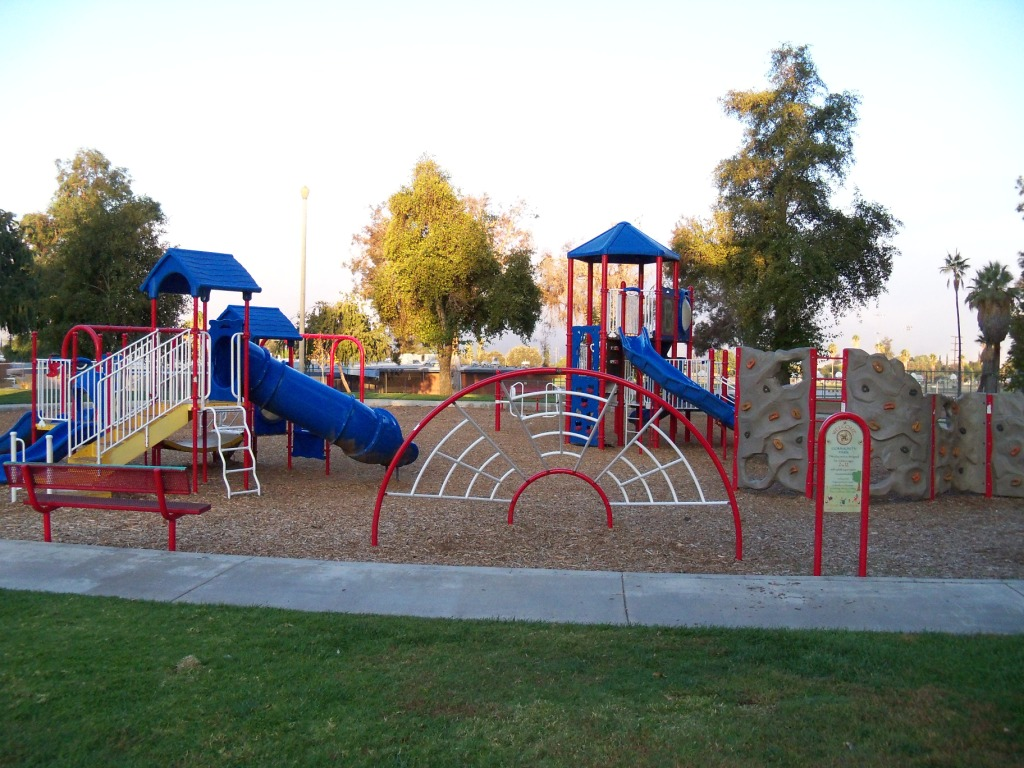

In [11]:
from IPython.display import Image
highest_populated_park = enriched_parks_areas[:1].squeeze()
Image(filename="images\\" + highest_populated_park["NAME"] + '.jpg') 

In [12]:
park_report = create_report(
    study_areas=[Point({"x":highest_populated_park["Longitude"], "y":highest_populated_park["Latitude"], "spatialReference": {"wkid":4326}})],
    options={"areaType":"NetworkServiceArea", "travel_mode": "Walking", "bufferUnits":"Minutes", "bufferRadii":[15]},
    report="key-facts", export_format="html"
)

park_report

webbrowser.open(park_report)

True

In [13]:
park_report = create_report(
    study_areas=[Point({"x":highest_populated_park["Longitude"], "y":highest_populated_park["Latitude"], "spatialReference": {"wkid":4326}})],
    report="eating-places",
    options={"areaType":"NetworkServiceArea", "travel_mode": "Walking", "bufferUnits":"Minutes", "bufferRadii":[15]},
    export_format="PDF",
    out_folder=r"reports",
    out_name="eating-places.pdf")

park_report

webbrowser.open(park_report)

True

In [14]:
park_report = create_report(
    study_areas=[Point({"x":highest_populated_park["Longitude"], "y":highest_populated_park["Latitude"], "spatialReference": {"wkid":4326}})],
    report="eating-places",
    options={"areaType":"NetworkServiceArea", "travel_mode": "Walking", "bufferUnits":"Minutes", "bufferRadii":[15]},
    export_format="XLSX",
    out_folder=r"reports",
    out_name="eating-places.xlsx")

park_report

webbrowser.open(park_report)

True